In [30]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

In [14]:
digits = load_digits()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [24]:
perceptron = OneVsRestClassifier(SklearnPerceptron(max_iter=1000, tol=1e-3, eta0=0.01))

In [26]:
perceptron.fit(X_train, y_train)

OneVsRestClassifier(estimator=Perceptron(eta0=0.01))

In [32]:
predictions = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.9527777777777777


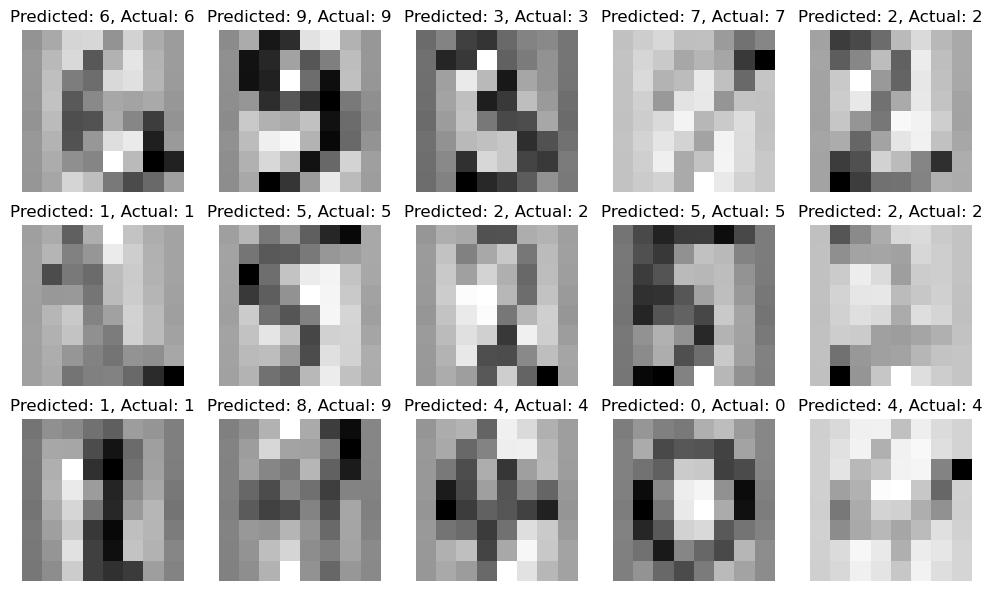

In [54]:
fig, axes = plt.subplots(3, 5, figsize=(10,6)) 
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8,8), cmap='binary')
    ax.set_title(f'Predicted: {predictions[i]}, Actual: {y_test[i]}')
    ax.axis('off')
    
plt.tight_layout()
plt.show()